# 1 - Exploracja danych ze zbioru Titanic:  
https://drive.google.com/drive/u/1/folders/1KvLpW2Mg2RGeJwAwu-EVkliB1vhVXU_h

## Przygotowanie środowiska

### Importowanie bibliotek

### Wczytanie danych

In [5]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
raw_data = pd.read_csv("titanic.csv")
raw_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,NaN,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Pierwsze zapoznanie się z danymi

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         793 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
raw_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
raw_data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## Exploracja danych

### Pozbycie się zbędnych kolumn

Dane muszą zostać przygotowane pod modele uczenia maszynowego w celu klasyfikacji binarnej dotyczącej przeżycia katastrofy.  
W związku z tym kolumny takie jak PassengerId','Name','Ticket','Cabin','Embarked' nie powinny mieć wpływu na klasyfikację.  
Kolumna 'Survived' jest kolumną docelową, która będzie wykorzystywana w dalszym uczelniu jako etykiety.  

In [10]:
target = raw_data['Survived']
filtered_columns = raw_data.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked'],axis=1)

In [11]:
filtered_columns.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


### Eksploracja poszczególnych cech

Dla ułatwienia dalszej eksploracji lepiej będzie już teraz podzielić zbiór danych na ludzi, którzy nie przeżyli lub przetrwali katastrofę Titanica.  

In [12]:
survived = filtered_columns[target == 1]
dead = filtered_columns[target == 0]

#### Cecha - Wieku

Cecha posiada wiele wartości brakujących dlatego weźmiemy pod uwagę tylko wiersze z uzupełnioną wartością wieku. 

In [13]:
with_age = filtered_columns[filtered_columns['Age'].notna()]

Histogram dla wieku  

Na wykresie widać, że większość osób obecnych na pokładzie było w wieku od 16-36 lat.  
Było również dużo dzieci w wieku od 0-5 lat.  
(wykres poniżej)

Text(0.5, 1.0, 'Age histogram')

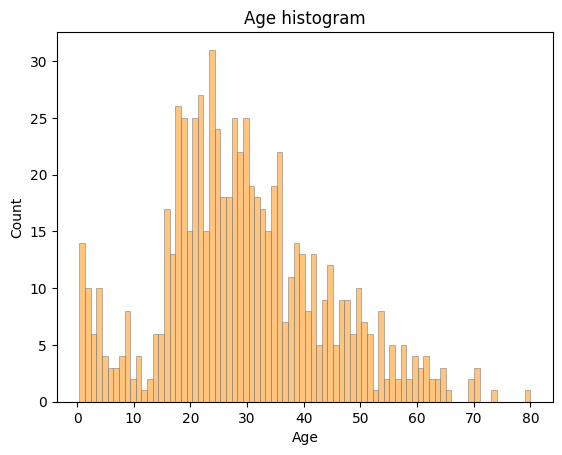

In [14]:
sb.histplot(with_age['Age'],bins=80,color='darkorange',alpha=0.5,edgecolor='gray')
plt.title("Age histogram")

Stworzyłem rozkłady gęstości dla wieku korzystając z wcześniejszego podziału.  

Widoczna jest duża przeżywalność wśród dzieci co może być spowodowane między innymi pierwszeństwem dzieci na szalupy ratunkowe lub rodzicami, którzy je uratowali.  
Można też zauważyć, że większośc osób powyżej 60 roku życia zginęło, pewnie przez o wiele gorszą sprawność fizyczną.  
Reszta wykresu jest proporcjonalna z ilością osób obecnych na pokładzie w poszczególnym wieku.   
(wykres poniżej)

Text(0.5, 1.0, 'Deceased density')

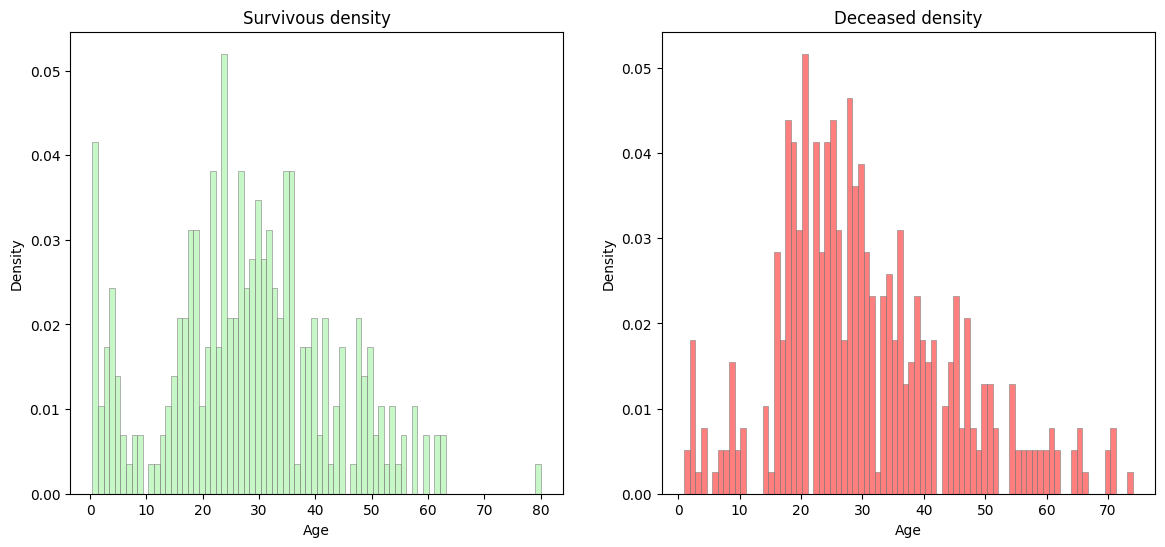

In [15]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
sb.histplot(survived['Age'],bins=80,color='lightgreen',alpha=0.5,edgecolor='gray',ax=ax[0],stat="density")
sb.histplot(dead['Age'],bins=80,color='red',alpha=0.5,edgecolor='gray',ax=ax[1],stat="density")
ax[0].set_title("Survivous density")
ax[1].set_title("Deceased density")

#### Cecha -  Płci

Sprawdzę teraz w jakim stopniu płeć wpływała na przyżywalność.

W tym celu stworzyłem wykres kolumnowy przedstawiający ilość osób poszczególnej płci z podziałem na przeżywalność.
Widoczna jest duża dystroporcja, pomimo dużej liczności mężczyźni charakteryzowali się kilkukrotnie gorszą przeżywalnością niż kobiety.  
Może być to spowodowane pierwszeństwem kobiet do szalup ratunkowych tak jak w przypadku dzieci oraz tym, że raczej mężczyźni próbowali ratować kobiety.  
(wykres poniżej)

Text(0.5, 1.0, 'Sex influence on surviving rate')

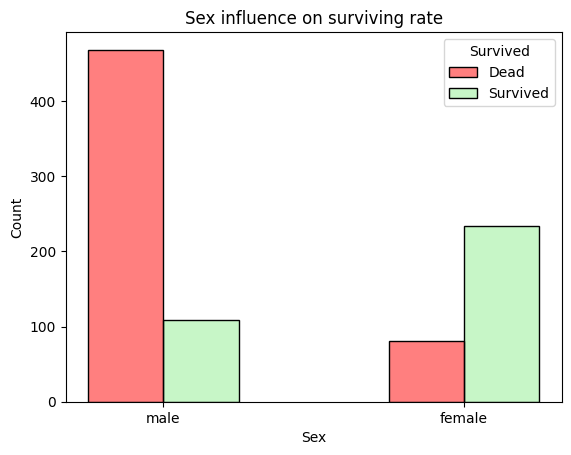

In [16]:
sb.histplot(data=filtered_columns,x="Sex",alpha=0.5,hue=target.map(lambda x:"Survived" if x == 1 else "Dead"),multiple="dodge",shrink=0.5,stat="count",palette={"Survived":"lightgreen","Dead":"red"})
plt.title("Sex influence on surviving rate")

Żeby jeszcze bardziej uwidocznić tą różnicę stworzyłem rozkłady gęstości z podziałem na płeć oraz przeżywalność.  
Kobiety cechują się wysoką przeżywalnością w każdym wieku.  
Śmiertelność mężczyzn jest proporcjonalna do ich ilości w danej grupie wiekowej za wyjątkiem wieku dziecięcego - spora cześć mężczyzn, która przeżyła była dziećmi  
(wykres poniżej)


Text(0.5, 1.0, 'Deceased by Sex density')

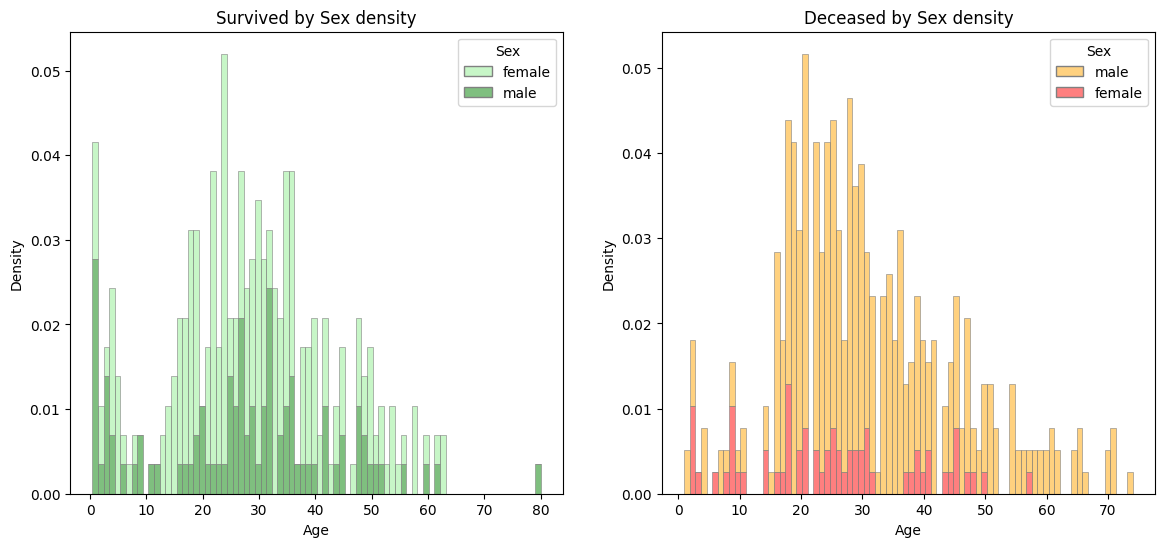

In [17]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
sb.histplot(survived,x='Age',bins=80,hue='Sex',alpha=0.5,edgecolor='gray',ax=ax[0],stat="density",multiple="stack",palette={"male":"green","female":"lightgreen"})
sb.histplot(dead,x='Age',bins=80,hue='Sex',alpha=0.5,edgecolor='gray',ax=ax[1],stat="density",multiple="stack",palette={"male":"orange","female":"red"})
ax[0].set_title("Survived by Sex density")
ax[1].set_title("Deceased by Sex density")

#### Cecha - opłata za bilet

Opłata za bilet może wywrzeć wpływ na śmiertelność pod względem umiescowienia na statku lub innych przywilejów.  
Poniżej stworzyłem wykres przedstawiający histogram ceny biletu z podziałem na przeżywalność.  
Ciekawe jest to, że osoby, które wydały sporo na bilet cechują się sporą przeżywalnością. 

Text(0.5, 1.0, 'Fare histogram')

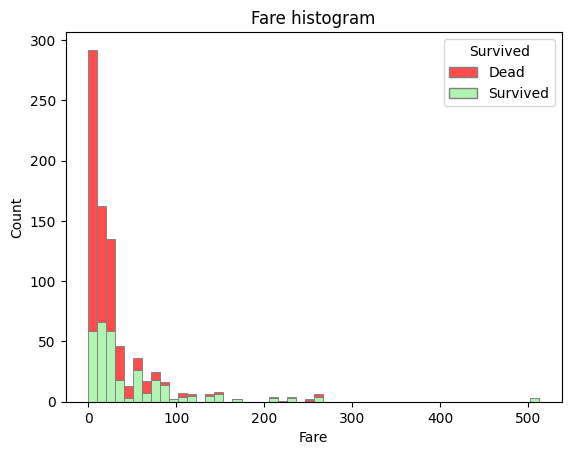

In [18]:
sb.histplot(x=filtered_columns['Fare'],bins=50,hue=target.map(lambda x: "Survived" if x == 1 else "Dead"),multiple="stack",palette={"Survived":"lightgreen","Dead":"red"},alpha=0.7,edgecolor='gray')
plt.title("Fare histogram")

Jednak może to być spowodowane innymi czynnikami. Żeby się upewnić poniżej znajduje się identyczny wykres tylko z podziałem na płeć.  
Wcześniej wykryta duża przeżywalność jest spowodowana tym, że w większośći to kobiety płaciły wysokie stawki za bilet.  

Text(0.5, 1.0, 'Fare histogram')

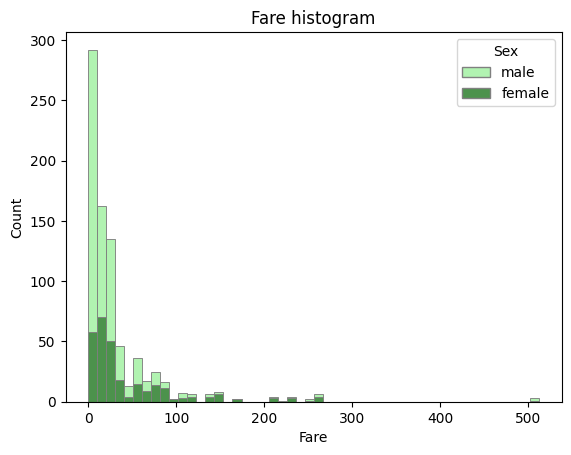

In [19]:
sb.histplot(data=filtered_columns,x=filtered_columns['Fare'],bins=50,hue='Sex',multiple="stack",palette={"male":"lightgreen","female":"darkgreen"},alpha=0.7,edgecolor='gray')
plt.title("Fare histogram")

#### Cecha - Pclass

Jest to cecha, która mówi o tym w której klasie podróżowała dana osoba.  
Może mieć to wpływ na umiejscowienie pasażera w momencie katastrofy.  

Poniżej widać to, że kobiety w większości podróżowały klasą 1 i 2, natomiast mężczyźni 3.  

Text(0.5, 1.0, 'Pclass count by Sex')

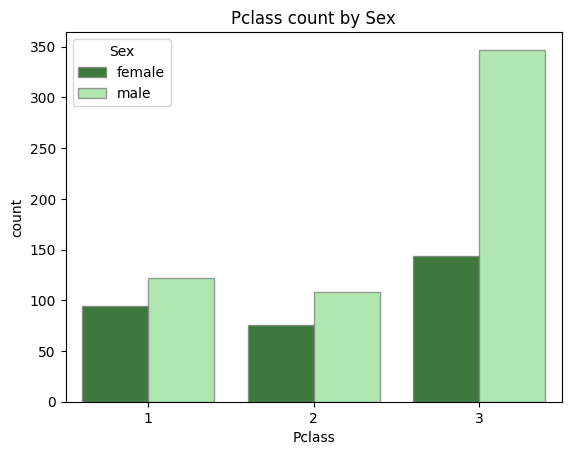

In [20]:
sb.countplot(data=filtered_columns,x='Pclass',hue='Sex',palette={"male":"lightgreen","female":"darkgreen"},edgecolor='gray',alpha=0.8)
plt.title("Pclass count by Sex")

Ten sam wykres ale z podziałem na przeżywalność pokazuje, że osoby z pierwszej klasy charakteryzowały się większą przeżywalnością niż osoby w drugiej klasie.  
(ilość kobiet i mężczyzn jest w nich podobna, więc można porównać)  

W klasie trzeciej śmiertelność z powodu dużej ilości osób w szczególnośći mężczyzn jest wysoka. 

Text(0.5, 1.0, 'Pclass count by Sex')

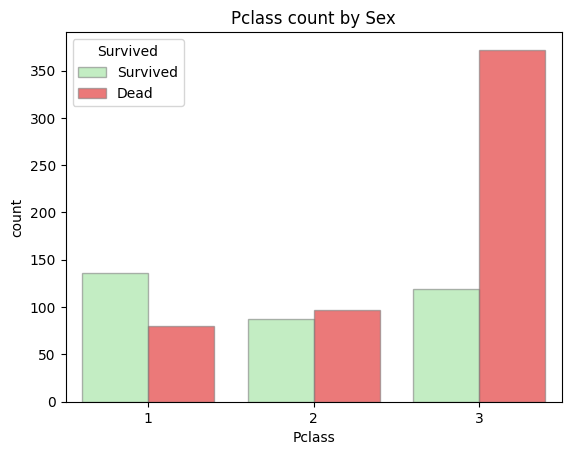

In [21]:
sb.countplot(data=filtered_columns,x='Pclass',hue=target.map(lambda x: "Survived" if x == 1 else "Dead"),palette={"Survived":"lightgreen","Dead":"red"},alpha=0.6,edgecolor='gray')
plt.title("Pclass count by Sex")

#### Cecha - SibSp

Cecha oznacza liczbę rodzeństwa lub małżonków na pokładzie dla poszczególnego pasażera.  

Na dwóch poniższych wykresach można zauważyć, że dla osób posiadających wartość SibSp większą od 3 śmiertelność jest bardzo wysoka.  
Wpływ na to może mieć to, że znaczna część tych osób jest płci męskiej.  

Text(0.5, 1.0, 'Pclass count by Sex')

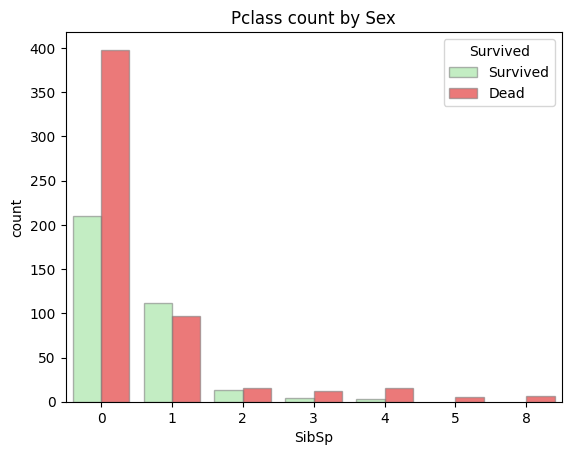

In [22]:
sb.countplot(data=filtered_columns,x='SibSp',hue=target.map(lambda x: "Survived" if x == 1 else "Dead"),palette={"Survived":"lightgreen","Dead":"red"},alpha=0.6,edgecolor='gray')
plt.title("Pclass count by Sex")

Text(0.5, 1.0, 'Pclass count by Sex')

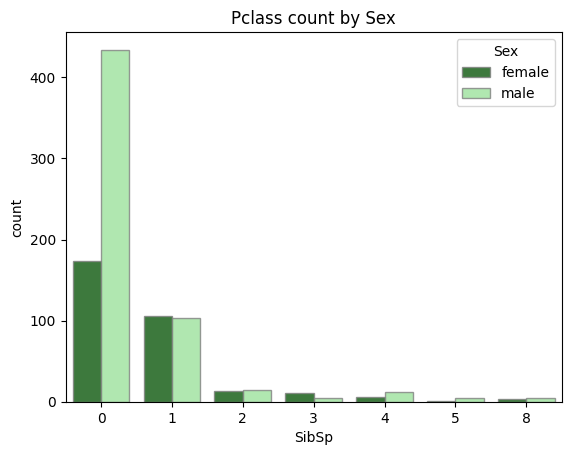

In [23]:
sb.countplot(data=filtered_columns,x='SibSp',hue='Sex',palette={"male":"lightgreen","female":"darkgreen"},edgecolor='gray',alpha=0.8)
plt.title("Pclass count by Sex")

#### Cecha - Parch

Cecha oznacza liczbę rodziców lub dzieci poszczególnego pasażera.  
Z ciekawych rzeczy, to z dwóch poniższych wykresów można zobaczyć wysoką śmiertelność osób, które miały wartość Parch wyższą lub równą 3.  

Nawet to, że większość tych osób to kobiety nie zmniejsza śmiertelnośći.  
Może to być spowodowane tym, że kobiety ratowały swoje dzieci, często poświęcając się lub miały mniejsze szanse dlatego, że musiały się nimi zajmować.  

Text(0.5, 1.0, 'Pclass count by Sex')

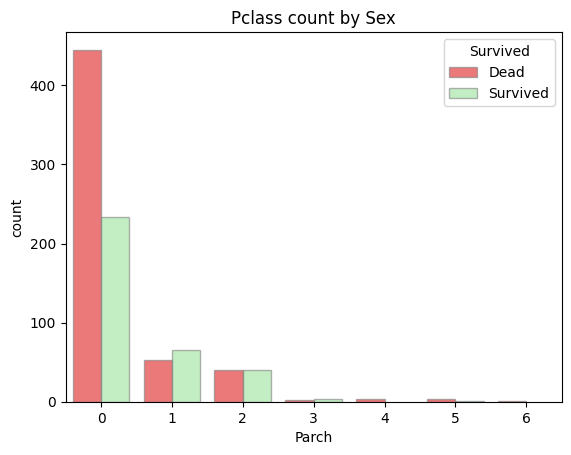

In [24]:
sb.countplot(data=filtered_columns,x='Parch',hue=target.map(lambda x: "Survived" if x == 1 else "Dead"),palette={"Survived":"lightgreen","Dead":"red"},alpha=0.6,edgecolor='gray')
plt.title("Pclass count by Sex")

Text(0.5, 1.0, 'Pclass count by Sex')

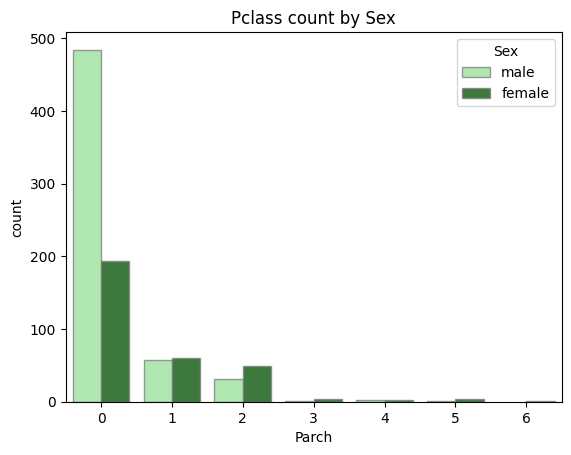

In [25]:
sb.countplot(data=filtered_columns,x='Parch',hue='Sex',palette={"male":"lightgreen","female":"darkgreen"},edgecolor='gray',alpha=0.8)
plt.title("Pclass count by Sex")

## Przygotowanie danych

In [26]:
filtered_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    793 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


Przygotowanie dantch do modeli uczenia maszynowego zacznę od usunięcia cechy Fare, ponieważ jest ona mocno skorelowana z płcią jak i również klasą (cechą Pclass).  
Dodatkowo posiada brakujące wartości.  

In [44]:
final_columns = filtered_columns.drop(['Fare'],axis=1)

Zastosuję kodowanie gorącojedynkowe do płci

In [45]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(filtered_columns[['Sex']])
encoder_columns = [x.split("_")[1] for x in encoder.get_feature_names_out()]
encoded = pd.DataFrame(encoded.toarray(),columns=encoder_columns)
encoded = encoded.drop(['male'],axis=1) # gdy są dwie cechy binarne to bez sensu jest używać dwóch kolumn

Zastosuję skalowanie minmax do wieku, ponieważ wartości tej cechy znacząco różnią się od innych pozostałych co może źle wpływać na niektóre modele uczenia maszynowego

In [46]:
scaler = MinMaxScaler()
scaled_age = scaler.fit_transform(filtered_columns[['Age']])
scaled_age = pd.DataFrame(scaled_age,columns=scaler.get_feature_names_out())

Łącze wszystko do jednego dataframe i usuwam stare kolumny

In [47]:
final_columns = final_columns.drop(['Sex','Age'],axis=1)
final_columns = pd.concat([final_columns,encoded,scaled_age],axis=1)

Cecha Age posiada dużo wartości odstających, jednak też jest cechą mającą duży wpływ na śmiertelność.  
Dlatego zrobię dwa końcowe zestawy danych. 
- Pierwszy będzie posiadał wszystkie wiersze, jednak bez atrybutu Age.
- Drugi będzie zawierał jedynie te wiersze, gdzie wartość atrybutu Age jest uzupełniona.

Brakujące wartości wieku możnaby uzupełniać z rozkładu cechy Age, jednak z powodu małej ilości danych (tylko 891 wierszy) może wpłynąć na wiarygodność klasyfikacji.

Pierwszy zestaw danych z wiekiem: 

In [59]:
final_data_with_age = final_columns.dropna()
target_with_age = target[final_data_with_age.index].reset_index(drop=True)
final_data_with_age = final_data_with_age.reset_index(drop=True)

Drugi zestaw danych bez wieku: 

In [60]:
final_data_without_age = final_columns.drop(['Age'],axis=1)

## Dane do modeli uczenia maszynowego

In [61]:
final_data_with_age

,Pclass,SibSp,Parch,female,Age
0,3,1,0,0.0,0.271174
1,1,1,0,1.0,0.472229
2,3,0,0,1.0,0.321438
3,1,1,0,1.0,0.434531
4,3,0,0,0.0,0.434531
...,...,...,...,...,...
709,3,0,5,1.0,0.484795
710,2,0,0,0.0,0.334004
711,1,0,0,1.0,0.233476
712,1,0,0,0.0,0.321438


In [62]:
final_data_without_age

,Pclass,SibSp,Parch,female
0,3,1,0,0.0
1,1,1,0,1.0
2,3,0,0,1.0
3,1,1,0,1.0
4,3,0,0,0.0
...,...,...,...,...
886,2,0,0,0.0
887,1,0,0,1.0
888,3,1,2,1.0
889,1,0,0,0.0


# 2 - Klasyfikacja

## Przygotowanie środowiska

### Importowanie bibliotek

In [173]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


### Wczytanie danych

In [64]:
data = final_data_with_age
data.head(5)

,Pclass,SibSp,Parch,female,Age
0,3,1,0,0.0,0.271174
1,1,1,0,1.0,0.472229
2,3,0,0,1.0,0.321438
3,1,1,0,1.0,0.434531
4,3,0,0,0.0,0.434531


## Dobieranie najlepszego modelu

Dobieram cztery modele, aby sprawdzić jak sobie radzą z klasyfikacją na standardowych parametrach.  
Z uwagi na małą ilość danych, wielokrotne powtarzanie treningu wielu modeli nie będzie wymagało wielu zasobów i czasu.  

### Definiowanie modeli

Aby zwiększośc dokładność regresji logistycznej, parametr max_iter ustawiam na 1000.  
Jest to klasyfikacja binarna, więc parametr n_clusters w modelu Kmeans ustawiam na 2.   

In [68]:
models = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'Kmeans' : KMeans(n_clusters=2)
}

### Znalezienie dwóch najlepiej sprawdzających się modeli

Za pomocą GridSearch z wbudowaną walidacją krzyżową szukam dwóch modeli, które najlepiej spisują się dla wprowadzonych danych.  
Takimi modelami jest model lasów losowych oraz klasyfikator wektorów nośnych.  

In [86]:
results = {}
for name, model in models.items():
    GS = GridSearchCV(model,param_grid={},cv=5,scoring='accuracy')
    GS.fit(data, target_with_age)
    results[name] = GS.best_score_
    print(f"{name}: {GS.best_score_}")

SVC: 0.7997340687481532
LogisticRegression: 0.7843593026691618
RandomForest: 0.8011622180636264
Kmeans: 0.5206638431990545


### Porównanie z dummy classifier

Powyższe modele znacznie lepiej sobie radzą niż prosty klasyfikator z parametrem 'most_frequent'

In [93]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(data, target_with_age)
dummy_score = dummy.score(data, target_with_age)
print(f"DummyClassifier accuracy: {dummy_score:.4f}")

DummyClassifier accuracy: 0.5938


### Szukanie najlepszych parametrów dla dwóch najlepszych modeli

Mam już wybrane dwa najlepsze modele, teraz będą szukał dla nich najlepszych parametrów.  
Użyję do tego GridSearchCV.  

W klasyfikatorze wektorów nośnych znajdują się zróżnicowane parametry C wpływające na regularyzację,  
oraz wartości jądra.  

W modelu lasów losowych określone zostały różne maksymalne głębokości lasu, podziału oraz liczbę drzew.  

In [123]:
models_two = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
}

In [124]:
parameters_two = {
    'SVC': {
        'C':[0.1,1,10,100],
        'kernel': ['linear','rbf','poly'],
    },
    'RandomForest': {
        'n_estimators': [25,50,100,200],
        'max_depth': [None,5,10,15],
        'min_samples_split': [2,5,10]
    }
}

In [125]:
results_two = {}
for name, models_two in models_two.items():
    GS_two = GridSearchCV(models_two,param_grid=parameters_two[name],cv=5,scoring='accuracy')
    GS_two.fit(data, target_with_age)
    results_two[name] = {
        'score': GS_two.best_score_,
        'parameters': GS_two.best_params_
    }
    print(f"{name}: {GS_two.best_score_} | {GS_two.best_params_}")

SVC: 0.8095932236777308 | {'C': 100, 'kernel': 'rbf'}
RandomForest: 0.8235595390524967 | {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


### Najlepszy model

Używam metryki dokładności, która w tym przypadku odzwierciedla procentową zgodność predykcji modelu z etykietami.  
Wartości te są w miarę wiarygodne i nie występuje tutaj wyciek danych z uwagi na wielokrotne stosowanie walidacji krzyżowej.  

Najlepszym okazał się model lasów losowych o parametrach 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50

In [128]:
results_two['RandomForest']

{'score': np.float64(0.8235595390524967),
 'parameters': {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}}

## Trenowanie najlepszego modelu

Po wybraniu najlepiej sprawdzającego się modelu i zestawu jego parametrów rozdzielam zbiór danych na zbiór treningowy i testowy, który będzie obejmował 20% danych.  
Następnie model jest trenowany na zbiorze treningowym.  

In [170]:
X_train,X_test,y_train,y_test = train_test_split(data,target_with_age,test_size=0.2)

In [171]:
best_model = RandomForestClassifier(max_depth=10,min_samples_split=5,n_estimators=50)
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

Dokładność predykcji modelu jest równa ~ 87,4% 

In [172]:
best_model.score(X_test,y_test)

0.8741258741258742

Tworzę macierz pomyłek aby zweryfikować, czy model nie jest przeciążony (bias).  
Wynika z niej, że model nie ulega przeciążeniu na którąś stronę.  

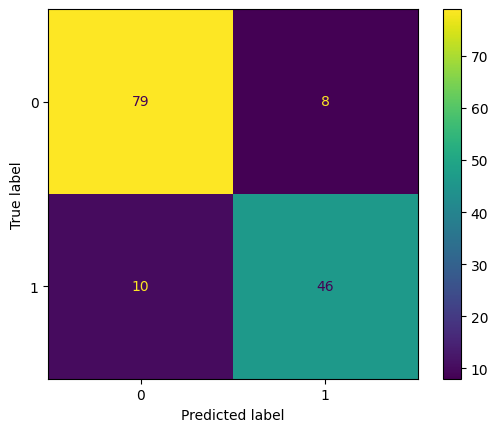

In [174]:
best_predictions = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, best_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()